In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../')
import retrieval_functions as rf

import importlib
importlib.reload(rf)
rf.init_plotting()


In [23]:
experiment="14_PSI4Nodes"
data=[]
for framework in ["HPMPC","MPyC","MP-SPDZ","MOTION"]:
    path= "..\..\..\Ergebnisse\Deviation\\"+framework+"\\"+experiment+"\data\short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time
        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [24]:
experiment="10_PSI"
data2=[]
for framework in ["HPMPC","MPyC","MP-SPDZ","MOTION"]:
    path= "..\..\..\Ergebnisse\Deviation\\"+framework+"\\"+experiment+"\data\short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data2.append(frame)

In [25]:
packetdrop,label=rf.get_packetdrop_deviation(data)
del packetdrop[5]
del label[5]
del packetdrop[3]
del label[3]
packetdrop[2],packetdrop[3]=packetdrop[3],packetdrop[2]

In [34]:
latency,label=rf.get_latency_deviation(data)
del latency[5]
del label[5]
del latency[2]
del label[2]
latency[2],latency[3]=latency[3],latency[2]

In [35]:
label

['HPMPC 65',
 'MPyC',
 'MP-SPDZ semi2k 10',
 'MP-SPDZ rep4-ring 100',
 'MOTION boolean_gmw']

In [36]:
latency2,label2=rf.get_latency_deviation(data2)

In [38]:
experiment="04_Private Set Intersect 4 Nodes"

In [94]:
latency,label=rf.get_latency_deviation(data)
del latency[5]
del label[5]
del latency[2]
del label[2]
latency[2],latency[3]=latency[3],latency[2]
label[2],label[3]=label[3],label[2]
latency2,label2=rf.get_latency_deviation(data2)
latency2[2],latency2[3]=latency2[3],latency2[2]
label2[2],label2[3]=label2[3],label2[2]

In [95]:
packetdrop_all=[]
label_all=[]
for i in range(0,len(label)):
    packetdrop_all.append(latency2[i])
    packetdrop_all.append(latency[i])
    label_all.append(label2[i])
    label_all.append(label[i])

In [97]:
label_all[0]="HP-MPC pas. adv./ hst. maj."
label_all[1]="HP-MPC act. adv./ hst. maj."
label_all[2]="MPyC pas. adv./ hst. maj."
label_all[3]="MPyC pas. adv./ hst. maj."
label_all[4]="MP-SPDZ pas. adv./ hst. maj."
label_all[5]="MP-SPDZ act. adv./ hst. maj."
label_all[6]="MP-SPDZ pas. adv./ dishst. maj."
label_all[7]="MP-SPDZ pas. adv./ dishst. maj.*"
label_all[8]="MOTION pas. adv./ dishst. maj."
label_all[9]="MOTION pas. adv./ dishst. maj."

In [98]:
table_string = "\\begin{center}\n"
table_string += "\\begin{tabular}{|c|c|c|c|c|}\n"
table_string += "\\hline\n"
table_string += "    & "
for band in packetdrop_all[0].index:
    table_string += "    " + str(band) + " & "
table_string = table_string[:-2] + "\\\\\n"
table_string += "\\hline\n"
for s,band in enumerate(packetdrop_all):
    table_string += label_all[s] + " & "
    if s%2==0:
        table_string += " 3 & "
    else:
        table_string += " 4 & "
    for i,value in enumerate(band.index):
        table_string += "    " + str(round(band['mean'].iloc[i],3)) + " "+ u"\u00B1" + " " + str(round(band['std'].iloc[i],3))  +  " & "
    table_string = table_string[:-2] + "\\\\\\hline\n"

table_string += "\\end{tabular}\n"
table_string += "\\end{center}"
print(table_string)

\begin{center}
\begin{tabular}{|c|c|c|c|c|}
\hline
    &     0 &     25 &     50 &     75 \\
\hline
HP-MPC pas. adv./ hst. maj. &  3 &     0.021 ± 0.004 &     0.789 ± 0.106 &     1.572 ± 0.182 &     2.362 ± 0.249 \\\hline
HP-MPC act. adv./ hst. maj. &  4 &     0.026 ± 0.005 &     0.85 ± 0.1 &     1.636 ± 0.146 &     2.469 ± 0.152 \\\hline
MPyC pas. adv./ hst. maj. &  3 &     7.615 ± 0.279 &     26.133 ± 0.292 &     45.939 ± 0.464 &     66.458 ± 0.63 \\\hline
MPyC pas. adv./ hst. maj. &  4 &     8.564 ± 0.619 &     26.752 ± 0.434 &     46.619 ± 0.511 &     66.799 ± 0.619 \\\hline
MP-SPDZ pas. adv./ hst. maj. &  3 &     0.114 ± 0.005 &     2.964 ± 0.005 &     5.682 ± 0.024 &     8.429 ± 0.022 \\\hline
MP-SPDZ act. adv./ hst. maj. &  4 &     0.145 ± 0.005 &     3.945 ± 0.01 &     7.592 ± 0.004 &     11.248 ± 0.004 \\\hline
MP-SPDZ pas. adv./ dishst. maj. &  3 &     40.302 ± 0.139 &     506.053 ± 0.142 &     971.249 ± 0.145 &     1436.325 ± 0.095 \\\hline
MP-SPDZ pas. adv./ dishst. maj.* &

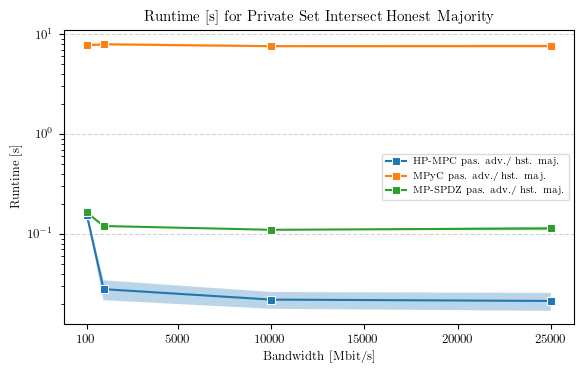

In [16]:
bandwidth_honest = [x for i, x in enumerate(bandwidth) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(bandwidth_honest,label_honest,"Bandwidth_dev_honest.png",experiment+" Honest Majority","Bandwidth [Mbit/s]","Runtime [s]",True,x_ticks=[100,5000,10000,15000,20000,25000])

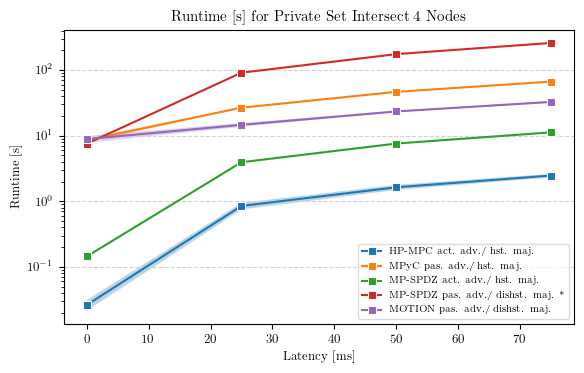

In [8]:
label[0]="HP-MPC act. adv./ hst. maj."
label[1]="MPyC pas. adv./ hst. maj."
label[2]="MP-SPDZ act. adv./ hst. maj."
label[3]="MP-SPDZ pas. adv./ dishst. maj. *"
label[4]="MOTION pas. adv./ dishst. maj."
rf.plot_deviation(latency,label,"Latency_dev.png",experiment,"Latency [ms]","Runtime [s]",True)

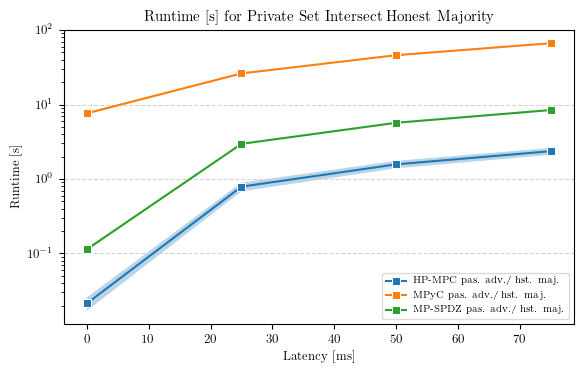

In [9]:
latency_honest = [x for i, x in enumerate(latency) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(latency_honest,label_honest,"Latency_dev_honest.png",experiment+" Honest Majority","Latency [ms]","Runtime [s]",True)

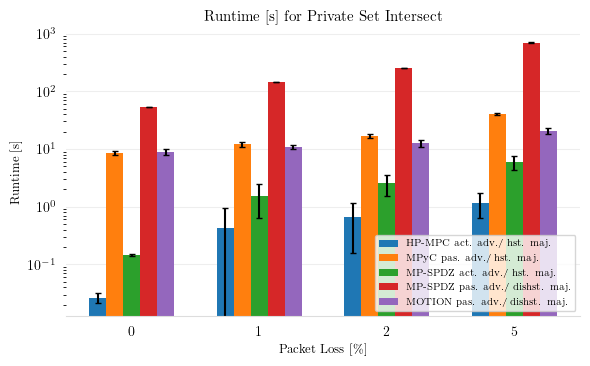

In [9]:
label[0]="HP-MPC act. adv./ hst. maj."
label[1]="MPyC pas. adv./ hst. maj."
label[2]="MP-SPDZ act. adv./ hst. maj."
label[3]="MP-SPDZ pas. adv./ dishst. maj."
label[4]="MOTION pas. adv./ dishst. maj."
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(4)*3  # Adjust the first parameter to center the bars

bar_list=[]
for i in range(len(packetdrop)):
    bar_list.append(ax.bar(ind - 0.8 + i * width, packetdrop[i]['mean'], width, yerr=packetdrop[i]['std'], label=label[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_yscale('log')
ax.set_ylabel('Runtime [s]')
ax.set_xlabel('Packet Loss [\%]')
ax.set_title('Runtime [s] for Private Set Intersect')
ax.set_xticks(ind)
ax.set_xticklabels((packetdrop[0]['packetdrops(%)']))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=10)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.set_yscale('log')
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
ax.legend(loc='lower right')
ax.figure.set_size_inches(5.91, 3.5)
plt.savefig(experiment+'_packetdrop_bar.png',dpi=300, bbox_inches='tight')
plt.show()

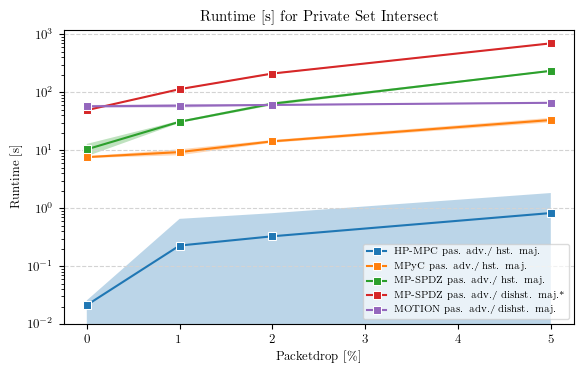

In [38]:
label[0]="HP-MPC act. adv./ hst. maj."
label[1]="MPyC pas. adv./ hst. maj."
label[2]="MP-SPDZ act. adv./ hst. maj."
label[3]="MP-SPDZ pas. adv./ dishst. maj.*"
label[4]="MOTION pas. adv./ dishst. maj."
rf.plot_deviation(packetdrop,label,"Mult_Packetdrop_dev.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

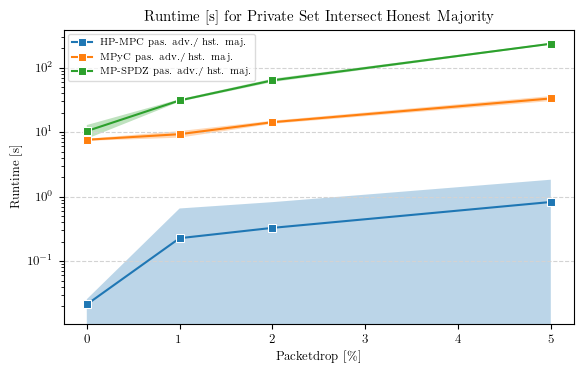

In [39]:
packetdrop_honest = [x for i, x in enumerate(packetdrop) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(packetdrop_honest,label_honest,"Mult_Packetdrop_dev_honest.png",experiment+" Honest Majority","Packetdrop [\%]","Runtime [s]",True)

In [13]:
label[0]="HP-MPC \n act. adv./ hst. maj."
label[1]="MPyC \n pas. adv./ hst. maj."
label[2]="MP-SPDZ \n act. adv./ hst. maj."
label[3]="MP-SPDZ \n pas. adv./ dishst. maj."
label[4]="MOTION \n pas. adv./ dishst. maj."

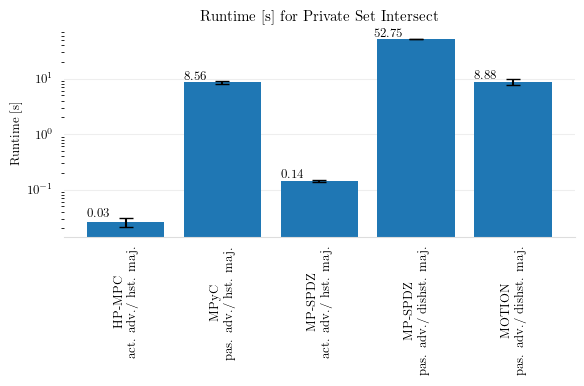

In [12]:
y_label="Runtime [s]"
titel="Runtime [s] for Private Set Intersect"
x_label="Protocols"
mean_values = [round(df['mean'].iloc[0],3) for df in packetdrop]
std_values = [round(df['std'].iloc[0],3) for df in packetdrop]
fig, ax = plt.subplots()
ax.set_yscale('log')  # Set y-axis as logarithmic
bars=ax.bar(label, mean_values,yerr=std_values,capsize=5)
ax.set_ylabel(y_label)
ax.set_title(titel)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
# Rotate labels
# Add values on top of bars
for i,bar in enumerate(bars):
    if i in [0,2]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.28, yval + 0.003, round(yval,2), ha='center', va='bottom',weight='bold')
    else:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.28, yval + 0.1, round(yval,2), ha='center', va='bottom',weight='bold')
ax.figure.set_size_inches(5.9, 2.5)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [82]:
bandwidth,label=rf.get_bandwidth_deviation(data)
del bandwidth[5]
del label[5]
del bandwidth[3]
del label[3]
bandwidth[2],bandwidth[3]=bandwidth[3],bandwidth[2]
label[2],label[3]=label[3],label[2]
bandwidth2,label2=rf.get_bandwidth_deviation(data2)
bandwidth2[2],bandwidth2[3]=bandwidth2[3],bandwidth2[2]
label2[2],label2[3]=label2[3],label2[2]
mean_values1 = [round(df['mean'].iloc[3],3) for df in bandwidth]
std_values1 = [round(df['std'].iloc[3],3) for df in bandwidth]
mean_values2 = [round(df['mean'].iloc[3],3) for df in bandwidth2]
std_values2 = [round(df['std'].iloc[3],3) for df in bandwidth2]

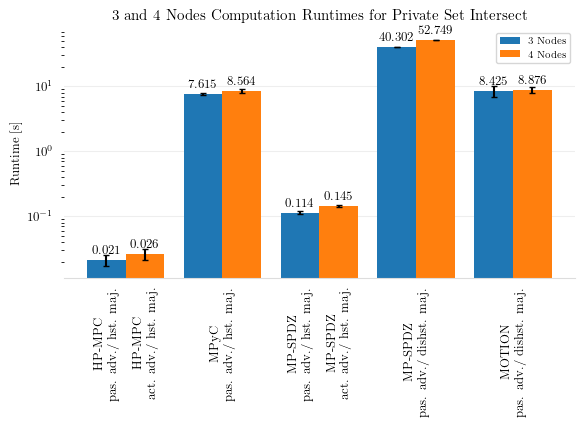

In [85]:
import numpy as np
y_label="Runtime [s]"
titel="Runtime in [s] for Neural Network Inference LeNet 4 Nodes"
x_label="Protocols"
# Convert the lists to numpy arrays
mean_values1 = np.array(mean_values1)
mean_values2 = np.array(mean_values2)
std_values1 = np.array(std_values1)
std_values2 = np.array(std_values2)
# Set the width of the bars
width = 0.4

# Create an array of indices for the x-axis
indices=np.arange(len(mean_values1))
ticks=[0,0.4,1.2,2,2.4,3.2,4.2]
labels=["HP-MPC \n pas. adv./ hst. maj.", "HP-MPC \n act. adv./ hst. maj.", "MPyC \n pas. adv./ hst. maj.","MP-SPDZ \n pas. adv./ hst. maj.","MP-SPDZ \n act. adv./ hst. maj."
,"MP-SPDZ \n pas. adv./ dishst. maj.","MOTION \n pas. adv./ dishst. maj."
]

# Create the figure and axis objects
fig, ax = plt.subplots()
# Plot the bars for mean_values2 next to mean_values1
bar1=ax.bar(indices, mean_values2,width,yerr=std_values2, label='3 Nodes')
# Plot the bars for mean_values1
bar2=ax.bar(indices+width, mean_values1, width,yerr=std_values1, label='4 Nodes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
# Set the x-axis labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Set the y-axis label
ax.set_ylabel(y_label)
ax.set_yscale('log')  # Set y-axis as logarithmic
# Set the title
ax.set_title('3 and 4 Nodes Computation Runtimes for Private Set Intersect')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
# Add a legend
ax.legend()
fig.tight_layout()
# Show the plot

ax.figure.set_size_inches(5.9, 3)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_comparison_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [77]:
values1=[]
error1=[]
values2=[]
error2=[]
for i in range(len(data)):
    if data[i]['framework'][0] == "HPMPC":
        for function in data[i]['function'].unique():
            date = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
            err = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].std())
            values1.append(round(date,2))
            error1.append(round(err,2))
    elif data[i]['framework'][0] in ["MP-SPDZ","MOTION"]:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["ps-rep-field","ps-rep-ring","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                date = float(data[i].loc[ (data[i]['protocol']==protocol) &  (data[i]['input_size']==100), ['peakRAM(MiB)']].mean())
                err = float(data[i].loc[ (data[i]['protocol']==protocol) &  (data[i]['input_size']==100), ['peakRAM(MiB)']].std())
                values1.append(round(date,2))
                error1.append(round(err,2))
    else:
        date = float(data[i]['peakRAM(MiB)'].mean())
        err = float(data[i]['peakRAM(MiB)'].std())
        values1.append(round(date,2))
        error1.append(round(err,2))

for i in range(len(data2)):
    if data2[i]['framework'][0] == "HPMPC":
        for function in data2[i]['function'].unique():
            date = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
            err = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].std())
            values2.append(round(date,2))
            error2.append(round(err,2))
    elif data2[i]['framework'][0] in ["MP-SPDZ","MOTION"]:
        for protocol in data2[i]['protocol'].unique():
            if protocol not in ["ps-rep-field","ps-rep-ring","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                date = float(data2[i].loc[ (data2[i]['protocol']==protocol) &  (data[i]['input_size']==100), ['peakRAM(MiB)']].mean())
                err = float(data2[i].loc[ (data2[i]['protocol']==protocol) &  (data[i]['input_size']==100), ['peakRAM(MiB)']].std())
                values2.append(round(date,2))
                error2.append(round(err,2))
    else:
        date = float(data2[i]['peakRAM(MiB)'].mean())
        err = float(data2[i]['peakRAM(MiB)'].std())
        values2.append(round(date,2))
        error2.append(round(err,2))

C:\Users\q533604\AppData\Local\Temp\ipykernel_11384\113947167.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  date = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
C:\Users\q533604\AppData\Local\Temp\ipykernel_11384\113947167.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  err = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].std())
C:\Users\q533604\AppData\Local\Temp\ipykernel_11384\113947167.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  date = float(data[i].loc[ (data[i]['protocol']==protocol) &  (data[i]['input_size']==100), ['peakRAM(MiB)']].mean())
C:\Users\q53360

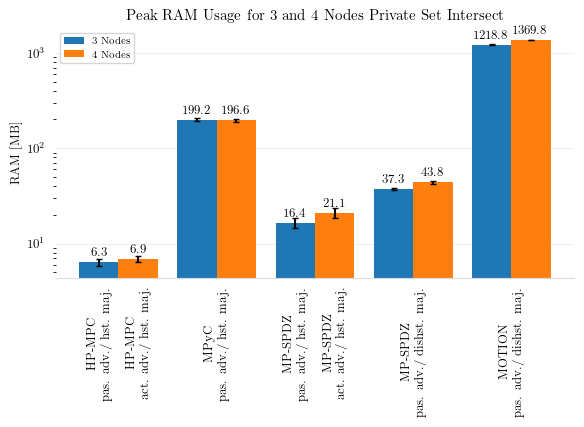

In [80]:
values1[2],values1[3]=values1[3],values1[2]
error1[2],error1[3]=error1[3],error1[2]
values2[2],values2[3]=values2[3],values2[2]
error2[2],error2[3]=error2[3],error2[2]
y_label="RAM [MB]"
titel="Peak RAM Usage for 3 and 4 Nodes Private Set Intersect"
x_label="Protocols"
# Convert the lists to numpy arrays
mean_values1 = np.array(values1)
mean_values2 = np.array(values2)
std_values1 = np.array(error1)
std_values2 = np.array(error2)
# Set the width of the bars
width = 0.4

# Create an array of indices for the x-axis
indices=np.arange(len(mean_values1))
ticks=[0,0.4,1.2,2,2.4,3.2,4.2]
labels=["HP-MPC \n pas. adv./ hst. maj.", "HP-MPC \n act. adv./ hst. maj.", "MPyC \n pas. adv./ hst. maj.","MP-SPDZ \n pas. adv./ hst. maj.","MP-SPDZ \n act. adv./ hst. maj."
,"MP-SPDZ \n pas. adv./ dishst. maj.","MOTION \n pas. adv./ dishst. maj."
]

# Create the figure and axis objects
fig, ax = plt.subplots()
# Plot the bars for mean_values2 next to mean_values1
bar1=ax.bar(indices, mean_values2,width,yerr=std_values2, label='3 Nodes')
# Plot the bars for mean_values1
bar2=ax.bar(indices+width, mean_values1, width,yerr=std_values1, label='4 Nodes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
# Set the x-axis labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Set the y-axis label
ax.set_ylabel(y_label)
ax.set_yscale('log')  # Set y-axis as logarithmic
# Set the title
ax.set_title(titel)

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Add a legend
ax.legend()
fig.tight_layout()
# Show the plot

ax.figure.set_size_inches(5.9, 3)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_RAM_bar.png',dpi=300, bbox_inches='tight')
plt.show()